In [1]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [42]:
district_eg_le = pd.read_csv('district_eg_le.csv')

In [2]:
def party_map(party):
    
    if party == 'democrat':
        
        return 'd_eg'
    
    else:
        
        return 'r_eg'

def fix(quantity):
    
    if len(quantity) < 1:
        
        return 'nan'
    
    elif len(quantity) > 1:
        
        return np.mean(quantity)
    
    else:
        
        return quantity
    
def party_fix(quantity):
    
    if len(quantity) < 1:
        
        party = 'nan'
    
    elif len(quantity) > 1:
        
        party = quantity[0]
    
    else:
        
        party = quantity
        
    if party == 1:
        
        party = 'democrat'
        
    else:
        
        party = 'republican'
        
    return party

In [3]:
raw_house =  pd.read_csv('1976-2018-house.csv', encoding='latin1')

In [4]:
rh = raw_house.copy(deep=True)

rh['candidatevotes'] = rh['candidatevotes'].str.replace(',', '')

rh[['candidatevotes']] = rh[['candidatevotes']].apply(pd.to_numeric)

rh['winner'] = 0

for year in raw_house.year.unique():
        
    for state in raw_house.state.unique():
                
        for district in raw_house[(raw_house.state==state) & (raw_house.year==year)].district.unique():
                                    
            rh.loc[rh[(rh.year==year)&(rh.state==state)&(rh.district==district)].candidatevotes.idxmax(), 'winner'] = 1

In [6]:
rh['wasted_votes'] = 0

for i in range(len(rh)):
    
    total = rh.iloc[i]['totalvotes']
    
    votes = rh.iloc[i]['candidatevotes']
    
    j = rh.iloc[i]['winner']
    
    rh.loc[rh.index==i, 'wasted_votes'] = (1 - j)*votes + j*(votes - total/2 - 1)

In [14]:
"""Deprecated"""
"""This is the state-wise Republican-Democrat efficiency gap."""

rd = rh[(rh.party=="democrat") | (rh.party=="republican")]

state_eg =  pd.DataFrame(columns=['year', 'state', 'd_eg', 'r_eg'])

for year in rd.year.unique():
        
    for state in rd.state.unique():
                    
        d_wasted_votes = rd.loc[(rd.year==year)&(rd.state==state)&(rd.party=='democrat'), 'wasted_votes'].sum()
        
        r_wasted_votes = rd.loc[(rd.year==year)&(rd.state==state)&(rd.party=='republican'), 'wasted_votes'].sum()

        total_votes = rh.loc[(rh.year==year)&(rh.state==state), 'totalvotes'].sum()
        
        d_eg = (r_wasted_votes - d_wasted_votes)/total_votes
        
        r_eg = (d_wasted_votes - r_wasted_votes)/total_votes
        
        state_eg = state_eg.append({'year':year, 'state':state, 'd_eg': d_eg, 'r_eg': r_eg}, ignore_index=True)


In [8]:
"""This is the individual district Republican-Democrat efficiency gap."""

district_eg =  pd.DataFrame(columns=['year', 'state', 'district', 'candidate', 'party', 'd_eg', 'r_eg'])

rd = rh.copy(deep=True) 

rd.loc[rd.district==0, 'district'] = 1

for year in rd.year.unique():
        
    for state in rd.state.unique():
        
        for district in rd.loc[(rd.year==year)&(rd.state==state), 'district'].unique():
            
            print(year, state, district)
            
            winning_party = rd.loc[(rd.year==year)
                                   &(rd.state==state)   
                                   &(rd.district==district)
                                   &(rd.winner==1), 'party'].values[0]

            candidate = rd.loc[(rd.year==year)
                                &(rd.state==state)
                                &(rd.district==district)
                                &(rd.winner==1), 'candidate'].values[0]
                        
            d_wasted_votes = rd.loc[(rd.year==year)
                                    &(rd.state==state)
                                    &(rd.party=='democrat')
                                    &(rd.district==district), 'wasted_votes']

            r_wasted_votes = rd.loc[(rd.year==year)
                                    &(rd.state==state)
                                    &(rd.party=='republican')
                                    &(rd.district==district), 'wasted_votes']
            
            total_votes = rh.loc[(rh.year==year)
                                 &(rh.state==state)
                                 &(rd.district==district), 'totalvotes'].values[0]
            
            if total_votes==0 | 1:
                
                d_eg, r_eg = 0, 0
                
            elif (len(r_wasted_votes) < 1) | (len(d_wasted_votes) < 1):
                
                r_eg, e_eg = 0, 0
                
            else:

                d_eg = (r_wasted_votes.values[0] - d_wasted_votes.values[0])/total_votes

                r_eg = (d_wasted_votes.values[0] - r_wasted_votes.values[0])/total_votes

            district_eg = district_eg.append({'year':year, 
                                              'state':state,
                                              'district': district,
                                              'candidate': candidate,
                                              'party': winning_party,
                                              'd_eg': d_eg, 
                                              'r_eg': r_eg}, ignore_index=True)


1976 Alabama 1
1976 Alabama 2
1976 Alabama 3
1976 Alabama 4
1976 Alabama 5
1976 Alabama 6
1976 Alabama 7
1976 Alaska 1
1976 Arizona 1
1976 Arizona 2
1976 Arizona 3
1976 Arizona 4
1976 Arkansas 1
1976 Arkansas 2
1976 Arkansas 3
1976 Arkansas 4
1976 California 1
1976 California 2
1976 California 3
1976 California 4
1976 California 5
1976 California 6
1976 California 7
1976 California 8
1976 California 9
1976 California 10
1976 California 11
1976 California 12
1976 California 13
1976 California 14
1976 California 15
1976 California 16
1976 California 17
1976 California 18
1976 California 19
1976 California 20
1976 California 21
1976 California 22
1976 California 23
1976 California 24
1976 California 25
1976 California 26
1976 California 27
1976 California 28
1976 California 29
1976 California 30
1976 California 31
1976 California 32
1976 California 33
1976 California 34
1976 California 35
1976 California 36
1976 California 37
1976 California 38
1976 California 39
1976 California 40
1976 C

1978 California 40
1978 California 41
1978 California 42
1978 California 43
1978 Colorado 1
1978 Colorado 2
1978 Colorado 3
1978 Colorado 4
1978 Colorado 5
1978 Connecticut 1
1978 Connecticut 2
1978 Connecticut 3
1978 Connecticut 4
1978 Connecticut 5
1978 Connecticut 6
1978 Delaware 1
1978 Florida 1
1978 Florida 2
1978 Florida 3
1978 Florida 4
1978 Florida 5
1978 Florida 6
1978 Florida 7
1978 Florida 8
1978 Florida 9
1978 Florida 10
1978 Florida 11
1978 Florida 12
1978 Florida 13
1978 Florida 14
1978 Florida 15
1978 Georgia 1
1978 Georgia 2
1978 Georgia 3
1978 Georgia 4
1978 Georgia 5
1978 Georgia 6
1978 Georgia 7
1978 Georgia 8
1978 Georgia 9
1978 Georgia 10
1978 Hawaii 1
1978 Hawaii 2
1978 Idaho 1
1978 Idaho 2
1978 Illinois 1
1978 Illinois 2
1978 Illinois 3
1978 Illinois 4
1978 Illinois 5
1978 Illinois 6
1978 Illinois 7
1978 Illinois 8
1978 Illinois 9
1978 Illinois 10
1978 Illinois 11
1978 Illinois 12
1978 Illinois 13
1978 Illinois 14
1978 Illinois 15
1978 Illinois 16
1978 Illinois 1

1980 Illinois 12
1980 Illinois 13
1980 Illinois 14
1980 Illinois 15
1980 Illinois 16
1980 Illinois 17
1980 Illinois 18
1980 Illinois 19
1980 Illinois 20
1980 Illinois 21
1980 Illinois 22
1980 Illinois 23
1980 Illinois 24
1980 Indiana 1
1980 Indiana 2
1980 Indiana 3
1980 Indiana 4
1980 Indiana 5
1980 Indiana 6
1980 Indiana 7
1980 Indiana 8
1980 Indiana 9
1980 Indiana 10
1980 Indiana 11
1980 Iowa 1
1980 Iowa 2
1980 Iowa 3
1980 Iowa 4
1980 Iowa 5
1980 Iowa 6
1980 Kansas 1
1980 Kansas 2
1980 Kansas 3
1980 Kansas 4
1980 Kansas 5
1980 Kentucky 1
1980 Kentucky 2
1980 Kentucky 3
1980 Kentucky 4
1980 Kentucky 5
1980 Kentucky 6
1980 Kentucky 7
1980 Louisiana 1
1980 Louisiana 2
1980 Louisiana 3
1980 Louisiana 4
1980 Louisiana 5
1980 Louisiana 6
1980 Louisiana 7
1980 Louisiana 8
1980 Maine 1
1980 Maine 2
1980 Maryland 1
1980 Maryland 2
1980 Maryland 3
1980 Maryland 4
1980 Maryland 5
1980 Maryland 6
1980 Maryland 7
1980 Maryland 8
1980 Massachusetts 1
1980 Massachusetts 2
1980 Massachusetts 3
1980 

1982 Maine 2
1982 Maryland 1
1982 Maryland 2
1982 Maryland 3
1982 Maryland 4
1982 Maryland 5
1982 Maryland 6
1982 Maryland 7
1982 Maryland 8
1982 Massachusetts 1
1982 Massachusetts 2
1982 Massachusetts 3
1982 Massachusetts 4
1982 Massachusetts 5
1982 Massachusetts 6
1982 Massachusetts 7
1982 Massachusetts 8
1982 Massachusetts 9
1982 Massachusetts 10
1982 Massachusetts 11
1982 Michigan 1
1982 Michigan 2
1982 Michigan 3
1982 Michigan 4
1982 Michigan 5
1982 Michigan 6
1982 Michigan 7
1982 Michigan 8
1982 Michigan 9
1982 Michigan 10
1982 Michigan 11
1982 Michigan 12
1982 Michigan 13
1982 Michigan 14
1982 Michigan 15
1982 Michigan 16
1982 Michigan 17
1982 Michigan 18
1982 Minnesota 1
1982 Minnesota 2
1982 Minnesota 3
1982 Minnesota 4
1982 Minnesota 5
1982 Minnesota 6
1982 Minnesota 7
1982 Minnesota 8
1982 Mississippi 1
1982 Mississippi 2
1982 Mississippi 3
1982 Mississippi 4
1982 Mississippi 5
1982 Missouri 1
1982 Missouri 2
1982 Missouri 3
1982 Missouri 4
1982 Missouri 5
1982 Missouri 6
19

1984 Missouri 1
1984 Missouri 2
1984 Missouri 3
1984 Missouri 4
1984 Missouri 5
1984 Missouri 6
1984 Missouri 7
1984 Missouri 8
1984 Missouri 9
1984 Montana 1
1984 Montana 2
1984 Nebraska 1
1984 Nebraska 2
1984 Nebraska 3
1984 Nevada 1
1984 Nevada 2
1984 New Hampshire 1
1984 New Hampshire 2
1984 New Jersey 1
1984 New Jersey 2
1984 New Jersey 3
1984 New Jersey 4
1984 New Jersey 5
1984 New Jersey 6
1984 New Jersey 7
1984 New Jersey 8
1984 New Jersey 9
1984 New Jersey 10
1984 New Jersey 11
1984 New Jersey 12
1984 New Jersey 13
1984 New Jersey 14
1984 New Mexico 1
1984 New Mexico 2
1984 New Mexico 3
1984 New York 1
1984 New York 2
1984 New York 3
1984 New York 4
1984 New York 5
1984 New York 6
1984 New York 7
1984 New York 8
1984 New York 9
1984 New York 10
1984 New York 11
1984 New York 12
1984 New York 13
1984 New York 14
1984 New York 15
1984 New York 16
1984 New York 17
1984 New York 18
1984 New York 19
1984 New York 20
1984 New York 21
1984 New York 22
1984 New York 23
1984 New York 2

1986 New York 19
1986 New York 20
1986 New York 21
1986 New York 22
1986 New York 23
1986 New York 24
1986 New York 25
1986 New York 26
1986 New York 27
1986 New York 28
1986 New York 29
1986 New York 30
1986 New York 31
1986 New York 32
1986 New York 33
1986 New York 34
1986 North Carolina 1
1986 North Carolina 2
1986 North Carolina 3
1986 North Carolina 4
1986 North Carolina 5
1986 North Carolina 6
1986 North Carolina 7
1986 North Carolina 8
1986 North Carolina 9
1986 North Carolina 10
1986 North Carolina 11
1986 North Dakota 1
1986 Ohio 1
1986 Ohio 2
1986 Ohio 3
1986 Ohio 4
1986 Ohio 5
1986 Ohio 6
1986 Ohio 7
1986 Ohio 8
1986 Ohio 9
1986 Ohio 10
1986 Ohio 11
1986 Ohio 12
1986 Ohio 13
1986 Ohio 14
1986 Ohio 15
1986 Ohio 16
1986 Ohio 17
1986 Ohio 18
1986 Ohio 19
1986 Ohio 20
1986 Ohio 21
1986 Oklahoma 1
1986 Oklahoma 2
1986 Oklahoma 3
1986 Oklahoma 4
1986 Oklahoma 5
1986 Oklahoma 6
1986 Oregon 1
1986 Oregon 2
1986 Oregon 3
1986 Oregon 4
1986 Oregon 5
1986 Pennsylvania 1
1986 Pennsylva

1988 Oregon 2
1988 Oregon 3
1988 Oregon 4
1988 Oregon 5
1988 Pennsylvania 1
1988 Pennsylvania 2
1988 Pennsylvania 3
1988 Pennsylvania 4
1988 Pennsylvania 5
1988 Pennsylvania 6
1988 Pennsylvania 7
1988 Pennsylvania 8
1988 Pennsylvania 9
1988 Pennsylvania 10
1988 Pennsylvania 11
1988 Pennsylvania 12
1988 Pennsylvania 13
1988 Pennsylvania 14
1988 Pennsylvania 15
1988 Pennsylvania 16
1988 Pennsylvania 17
1988 Pennsylvania 18
1988 Pennsylvania 19
1988 Pennsylvania 20
1988 Pennsylvania 21
1988 Pennsylvania 22
1988 Pennsylvania 23
1988 Rhode Island 1
1988 Rhode Island 2
1988 South Carolina 1
1988 South Carolina 2
1988 South Carolina 3
1988 South Carolina 4
1988 South Carolina 5
1988 South Carolina 6
1988 South Dakota 1
1988 Tennessee 1
1988 Tennessee 2
1988 Tennessee 3
1988 Tennessee 4
1988 Tennessee 5
1988 Tennessee 6
1988 Tennessee 7
1988 Tennessee 8
1988 Tennessee 9
1988 Texas 1
1988 Texas 2
1988 Texas 3
1988 Texas 4
1988 Texas 5
1988 Texas 6
1988 Texas 7
1988 Texas 8
1988 Texas 9
1988 Tex

1990 Texas 4
1990 Texas 5
1990 Texas 6
1990 Texas 7
1990 Texas 8
1990 Texas 9
1990 Texas 10
1990 Texas 11
1990 Texas 12
1990 Texas 13
1990 Texas 14
1990 Texas 15
1990 Texas 16
1990 Texas 17
1990 Texas 18
1990 Texas 19
1990 Texas 20
1990 Texas 21
1990 Texas 22
1990 Texas 23
1990 Texas 24
1990 Texas 25
1990 Texas 26
1990 Texas 27
1990 Utah 1
1990 Utah 2
1990 Utah 3
1990 Vermont 1
1990 Virginia 1
1990 Virginia 2
1990 Virginia 3
1990 Virginia 4
1990 Virginia 5
1990 Virginia 6
1990 Virginia 7
1990 Virginia 8
1990 Virginia 9
1990 Virginia 10
1990 Washington 1
1990 Washington 2
1990 Washington 3
1990 Washington 4
1990 Washington 5
1990 Washington 6
1990 Washington 7
1990 Washington 8
1990 West Virginia 1
1990 West Virginia 2
1990 West Virginia 3
1990 West Virginia 4
1990 Wisconsin 1
1990 Wisconsin 2
1990 Wisconsin 3
1990 Wisconsin 4
1990 Wisconsin 5
1990 Wisconsin 6
1990 Wisconsin 7
1990 Wisconsin 8
1990 Wisconsin 9
1990 Wyoming 1
1992 Alabama 1
1992 Alabama 2
1992 Alabama 3
1992 Alabama 4
19

1992 Wyoming 1
1994 Alabama 1
1994 Alabama 2
1994 Alabama 3
1994 Alabama 4
1994 Alabama 5
1994 Alabama 6
1994 Alabama 7
1994 Alaska 1
1994 Arizona 1
1994 Arizona 2
1994 Arizona 3
1994 Arizona 4
1994 Arizona 5
1994 Arizona 6
1994 Arkansas 1
1994 Arkansas 2
1994 Arkansas 3
1994 Arkansas 4
1994 California 1
1994 California 2
1994 California 3
1994 California 4
1994 California 5
1994 California 6
1994 California 7
1994 California 8
1994 California 9
1994 California 10
1994 California 11
1994 California 12
1994 California 13
1994 California 14
1994 California 15
1994 California 16
1994 California 17
1994 California 18
1994 California 19
1994 California 20
1994 California 21
1994 California 22
1994 California 23
1994 California 24
1994 California 25
1994 California 26
1994 California 27
1994 California 28
1994 California 29
1994 California 30
1994 California 31
1994 California 32
1994 California 33
1994 California 34
1994 California 35
1994 California 36
1994 California 37
1994 California 38

1996 California 39
1996 California 40
1996 California 41
1996 California 42
1996 California 43
1996 California 44
1996 California 45
1996 California 46
1996 California 47
1996 California 48
1996 California 49
1996 California 50
1996 California 51
1996 California 52
1996 Colorado 1
1996 Colorado 2
1996 Colorado 3
1996 Colorado 4
1996 Colorado 5
1996 Colorado 6
1996 Connecticut 1
1996 Connecticut 2
1996 Connecticut 3
1996 Connecticut 4
1996 Connecticut 5
1996 Connecticut 6
1996 Delaware 1
1996 Florida 1
1996 Florida 2
1996 Florida 3
1996 Florida 4
1996 Florida 5
1996 Florida 6
1996 Florida 7
1996 Florida 8
1996 Florida 9
1996 Florida 10
1996 Florida 11
1996 Florida 12
1996 Florida 13
1996 Florida 14
1996 Florida 15
1996 Florida 16
1996 Florida 17
1996 Florida 18
1996 Florida 19
1996 Florida 20
1996 Florida 21
1996 Florida 22
1996 Florida 23
1996 Georgia 1
1996 Georgia 2
1996 Georgia 3
1996 Georgia 4
1996 Georgia 5
1996 Georgia 6
1996 Georgia 7
1996 Georgia 8
1996 Georgia 9
1996 Georgia 1

1998 Georgia 9
1998 Georgia 10
1998 Georgia 11
1998 Hawaii 1
1998 Hawaii 2
1998 Idaho 1
1998 Idaho 2
1998 Illinois 1
1998 Illinois 2
1998 Illinois 3
1998 Illinois 4
1998 Illinois 5
1998 Illinois 6
1998 Illinois 7
1998 Illinois 8
1998 Illinois 9
1998 Illinois 10
1998 Illinois 11
1998 Illinois 12
1998 Illinois 13
1998 Illinois 14
1998 Illinois 15
1998 Illinois 16
1998 Illinois 17
1998 Illinois 18
1998 Illinois 19
1998 Illinois 20
1998 Indiana 1
1998 Indiana 2
1998 Indiana 3
1998 Indiana 4
1998 Indiana 5
1998 Indiana 6
1998 Indiana 7
1998 Indiana 8
1998 Indiana 9
1998 Indiana 10
1998 Iowa 1
1998 Iowa 2
1998 Iowa 3
1998 Iowa 4
1998 Iowa 5
1998 Kansas 1
1998 Kansas 2
1998 Kansas 3
1998 Kansas 4
1998 Kentucky 1
1998 Kentucky 2
1998 Kentucky 3
1998 Kentucky 4
1998 Kentucky 5
1998 Kentucky 6
1998 Louisiana 1
1998 Louisiana 2
1998 Louisiana 3
1998 Louisiana 4
1998 Louisiana 5
1998 Louisiana 6
1998 Louisiana 7
1998 Maine 1
1998 Maine 2
1998 Maryland 1
1998 Maryland 2
1998 Maryland 3
1998 Marylan

2000 Maine 2
2000 Maryland 1
2000 Maryland 2
2000 Maryland 3
2000 Maryland 4
2000 Maryland 5
2000 Maryland 6
2000 Maryland 7
2000 Maryland 8
2000 Massachusetts 1
2000 Massachusetts 2
2000 Massachusetts 3
2000 Massachusetts 4
2000 Massachusetts 5
2000 Massachusetts 6
2000 Massachusetts 7
2000 Massachusetts 8
2000 Massachusetts 9
2000 Massachusetts 10
2000 Michigan 1
2000 Michigan 2
2000 Michigan 3
2000 Michigan 4
2000 Michigan 5
2000 Michigan 6
2000 Michigan 7
2000 Michigan 8
2000 Michigan 9
2000 Michigan 10
2000 Michigan 11
2000 Michigan 12
2000 Michigan 13
2000 Michigan 14
2000 Michigan 15
2000 Michigan 16
2000 Minnesota 1
2000 Minnesota 2
2000 Minnesota 3
2000 Minnesota 4
2000 Minnesota 5
2000 Minnesota 6
2000 Minnesota 7
2000 Minnesota 8
2000 Mississippi 1
2000 Mississippi 2
2000 Mississippi 3
2000 Mississippi 4
2000 Mississippi 5
2000 Missouri 1
2000 Missouri 2
2000 Missouri 3
2000 Missouri 4
2000 Missouri 5
2000 Missouri 6
2000 Missouri 7
2000 Missouri 8
2000 Missouri 9
2000 Monta

2002 Missouri 6
2002 Missouri 7
2002 Missouri 8
2002 Missouri 9
2002 Montana 1
2002 Nebraska 1
2002 Nebraska 2
2002 Nebraska 3
2002 Nevada 1
2002 Nevada 2
2002 Nevada 3
2002 New Hampshire 1
2002 New Hampshire 2
2002 New Jersey 1
2002 New Jersey 2
2002 New Jersey 3
2002 New Jersey 4
2002 New Jersey 5
2002 New Jersey 6
2002 New Jersey 7
2002 New Jersey 8
2002 New Jersey 9
2002 New Jersey 10
2002 New Jersey 11
2002 New Jersey 12
2002 New Jersey 13
2002 New Mexico 1
2002 New Mexico 2
2002 New Mexico 3
2002 New York 1
2002 New York 2
2002 New York 3
2002 New York 4
2002 New York 5
2002 New York 6
2002 New York 7
2002 New York 8
2002 New York 9
2002 New York 10
2002 New York 11
2002 New York 12
2002 New York 13
2002 New York 14
2002 New York 15
2002 New York 16
2002 New York 17
2002 New York 18
2002 New York 19
2002 New York 20
2002 New York 21
2002 New York 22
2002 New York 23
2002 New York 24
2002 New York 25
2002 New York 26
2002 New York 27
2002 New York 28
2002 New York 29
2002 North Ca

2004 New York 25
2004 New York 26
2004 New York 27
2004 New York 28
2004 New York 29
2004 North Carolina 1
2004 North Carolina 2
2004 North Carolina 3
2004 North Carolina 4
2004 North Carolina 5
2004 North Carolina 6
2004 North Carolina 7
2004 North Carolina 8
2004 North Carolina 9
2004 North Carolina 10
2004 North Carolina 11
2004 North Carolina 12
2004 North Carolina 13
2004 North Dakota 1
2004 Ohio 1
2004 Ohio 2
2004 Ohio 3
2004 Ohio 4
2004 Ohio 5
2004 Ohio 6
2004 Ohio 7
2004 Ohio 8
2004 Ohio 9
2004 Ohio 10
2004 Ohio 11
2004 Ohio 12
2004 Ohio 13
2004 Ohio 14
2004 Ohio 15
2004 Ohio 16
2004 Ohio 17
2004 Ohio 18
2004 Oklahoma 1
2004 Oklahoma 2
2004 Oklahoma 3
2004 Oklahoma 4
2004 Oklahoma 5
2004 Oregon 1
2004 Oregon 2
2004 Oregon 3
2004 Oregon 4
2004 Oregon 5
2004 Pennsylvania 1
2004 Pennsylvania 2
2004 Pennsylvania 3
2004 Pennsylvania 4
2004 Pennsylvania 5
2004 Pennsylvania 6
2004 Pennsylvania 7
2004 Pennsylvania 8
2004 Pennsylvania 9
2004 Pennsylvania 10
2004 Pennsylvania 11
2004 Pen

2006 Pennsylvania 9
2006 Pennsylvania 10
2006 Pennsylvania 11
2006 Pennsylvania 12
2006 Pennsylvania 13
2006 Pennsylvania 14
2006 Pennsylvania 15
2006 Pennsylvania 16
2006 Pennsylvania 17
2006 Pennsylvania 18
2006 Pennsylvania 19
2006 Rhode Island 1
2006 Rhode Island 2
2006 South Carolina 1
2006 South Carolina 2
2006 South Carolina 3
2006 South Carolina 4
2006 South Carolina 5
2006 South Carolina 6
2006 South Dakota 1
2006 Tennessee 1
2006 Tennessee 2
2006 Tennessee 3
2006 Tennessee 4
2006 Tennessee 5
2006 Tennessee 6
2006 Tennessee 7
2006 Tennessee 8
2006 Tennessee 9
2006 Texas 1
2006 Texas 2
2006 Texas 3
2006 Texas 4
2006 Texas 5
2006 Texas 6
2006 Texas 7
2006 Texas 8
2006 Texas 9
2006 Texas 10
2006 Texas 11
2006 Texas 12
2006 Texas 13
2006 Texas 14
2006 Texas 15
2006 Texas 16
2006 Texas 17
2006 Texas 18
2006 Texas 19
2006 Texas 20
2006 Texas 21
2006 Texas 22
2006 Texas 23
2006 Texas 24
2006 Texas 25
2006 Texas 26
2006 Texas 27
2006 Texas 28
2006 Texas 29
2006 Texas 30
2006 Texas 31


2008 Texas 32
2008 Utah 1
2008 Utah 2
2008 Utah 3
2008 Vermont 1
2008 Virginia 1
2008 Virginia 2
2008 Virginia 3
2008 Virginia 4
2008 Virginia 5
2008 Virginia 6
2008 Virginia 7
2008 Virginia 8
2008 Virginia 9
2008 Virginia 10
2008 Virginia 11
2008 Washington 1
2008 Washington 2
2008 Washington 3
2008 Washington 4
2008 Washington 5
2008 Washington 6
2008 Washington 7
2008 Washington 8
2008 Washington 9
2008 West Virginia 1
2008 West Virginia 2
2008 West Virginia 3
2008 Wisconsin 1
2008 Wisconsin 2
2008 Wisconsin 3
2008 Wisconsin 4
2008 Wisconsin 5
2008 Wisconsin 6
2008 Wisconsin 7
2008 Wisconsin 8
2008 Wyoming 1
2010 Alabama 1
2010 Alabama 2
2010 Alabama 3
2010 Alabama 4
2010 Alabama 5
2010 Alabama 6
2010 Alabama 7
2010 Alaska 1
2010 Arizona 1
2010 Arizona 2
2010 Arizona 3
2010 Arizona 4
2010 Arizona 5
2010 Arizona 6
2010 Arizona 7
2010 Arizona 8
2010 Arkansas 1
2010 Arkansas 2
2010 Arkansas 3
2010 Arkansas 4
2010 California 1
2010 California 2
2010 California 3
2010 California 4
2010 C

2012 Arkansas 4
2012 California 1
2012 California 2
2012 California 3
2012 California 4
2012 California 5
2012 California 6
2012 California 7
2012 California 8
2012 California 9
2012 California 10
2012 California 11
2012 California 12
2012 California 13
2012 California 14
2012 California 15
2012 California 16
2012 California 17
2012 California 18
2012 California 19
2012 California 20
2012 California 21
2012 California 22
2012 California 23
2012 California 24
2012 California 25
2012 California 26
2012 California 27
2012 California 28
2012 California 29
2012 California 30
2012 California 31
2012 California 32
2012 California 33
2012 California 34
2012 California 35
2012 California 36
2012 California 37
2012 California 38
2012 California 39
2012 California 40
2012 California 41
2012 California 42
2012 California 43
2012 California 44
2012 California 45
2012 California 46
2012 California 47
2012 California 48
2012 California 49
2012 California 50
2012 California 51
2012 California 52
2012 

2014 California 51
2014 California 52
2014 California 53
2014 Colorado 1
2014 Colorado 2
2014 Colorado 3
2014 Colorado 4
2014 Colorado 5
2014 Colorado 6
2014 Colorado 7
2014 Connecticut 1
2014 Connecticut 2
2014 Connecticut 3
2014 Connecticut 4
2014 Connecticut 5
2014 Delaware 1
2014 Florida 1
2014 Florida 2
2014 Florida 3
2014 Florida 4
2014 Florida 5
2014 Florida 6
2014 Florida 7
2014 Florida 8
2014 Florida 9
2014 Florida 10
2014 Florida 11
2014 Florida 12
2014 Florida 13
2014 Florida 14
2014 Florida 15
2014 Florida 16
2014 Florida 17
2014 Florida 18
2014 Florida 19
2014 Florida 20
2014 Florida 21
2014 Florida 22
2014 Florida 23
2014 Florida 24
2014 Florida 25
2014 Florida 26
2014 Florida 27
2014 Georgia 1
2014 Georgia 2
2014 Georgia 3
2014 Georgia 4
2014 Georgia 5
2014 Georgia 6
2014 Georgia 7
2014 Georgia 8
2014 Georgia 9
2014 Georgia 10
2014 Georgia 11
2014 Georgia 12
2014 Georgia 13
2014 Georgia 14
2014 Hawaii 1
2014 Hawaii 2
2014 Idaho 1
2014 Idaho 2
2014 Illinois 1
2014 Illinoi

2016 Hawaii 2
2016 Idaho 1
2016 Idaho 2
2016 Illinois 1
2016 Illinois 2
2016 Illinois 3
2016 Illinois 4
2016 Illinois 5
2016 Illinois 6
2016 Illinois 7
2016 Illinois 8
2016 Illinois 9
2016 Illinois 10
2016 Illinois 11
2016 Illinois 12
2016 Illinois 13
2016 Illinois 14
2016 Illinois 15
2016 Illinois 16
2016 Illinois 17
2016 Illinois 18
2016 Indiana 1
2016 Indiana 2
2016 Indiana 3
2016 Indiana 4
2016 Indiana 5
2016 Indiana 6
2016 Indiana 7
2016 Indiana 8
2016 Indiana 9
2016 Iowa 1
2016 Iowa 2
2016 Iowa 3
2016 Iowa 4
2016 Kansas 1
2016 Kansas 2
2016 Kansas 3
2016 Kansas 4
2016 Kentucky 1
2016 Kentucky 2
2016 Kentucky 3
2016 Kentucky 4
2016 Kentucky 5
2016 Kentucky 6
2016 Louisiana 1
2016 Louisiana 2
2016 Louisiana 3
2016 Louisiana 4
2016 Louisiana 5
2016 Louisiana 6
2016 Maine 1
2016 Maine 2
2016 Maryland 1
2016 Maryland 2
2016 Maryland 3
2016 Maryland 4
2016 Maryland 5
2016 Maryland 6
2016 Maryland 7
2016 Maryland 8
2016 Massachusetts 1
2016 Massachusetts 2
2016 Massachusetts 3
2016 Mass

2018 Maryland 8
2018 Massachusetts 1
2018 Massachusetts 2
2018 Massachusetts 3
2018 Massachusetts 4
2018 Massachusetts 5
2018 Massachusetts 6
2018 Massachusetts 7
2018 Massachusetts 8
2018 Massachusetts 9
2018 Michigan 1
2018 Michigan 2
2018 Michigan 3
2018 Michigan 4
2018 Michigan 5
2018 Michigan 6
2018 Michigan 7
2018 Michigan 8
2018 Michigan 9
2018 Michigan 10
2018 Michigan 11
2018 Michigan 12
2018 Michigan 13
2018 Michigan 14
2018 Minnesota 1
2018 Minnesota 2
2018 Minnesota 3
2018 Minnesota 4
2018 Minnesota 5
2018 Minnesota 6
2018 Minnesota 7
2018 Minnesota 8
2018 Mississippi 1
2018 Mississippi 2
2018 Mississippi 3
2018 Mississippi 4
2018 Missouri 1
2018 Missouri 2
2018 Missouri 3
2018 Missouri 4
2018 Missouri 5
2018 Missouri 6
2018 Missouri 7
2018 Missouri 8
2018 Montana 1
2018 Nebraska 1
2018 Nebraska 2
2018 Nebraska 3
2018 Nevada 1
2018 Nevada 2
2018 Nevada 3
2018 Nevada 4
2018 New Hampshire 1
2018 New Hampshire 2
2018 New Jersey 1
2018 New Jersey 2
2018 New Jersey 3
2018 New Je

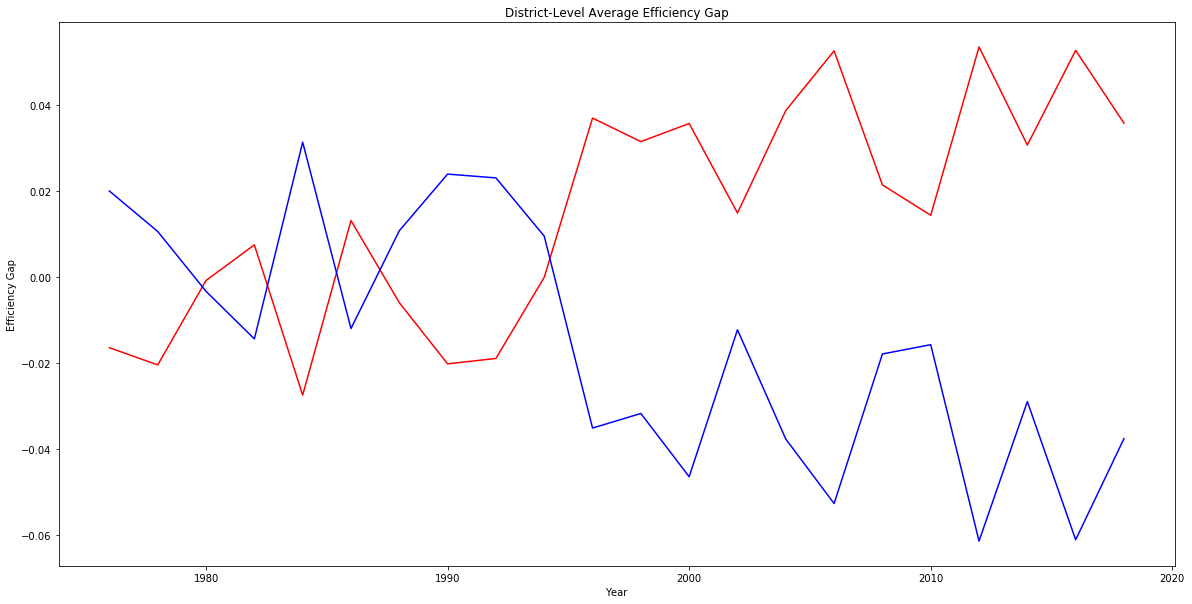

In [9]:
fig = plt.figure(figsize=[20, 10])

sns.lineplot(x=district_eg.year.unique(), y=district_eg.groupby(['year']).mean()['r_eg'].values, color='red')

sns.lineplot(x=district_eg.year.unique(), y=district_eg.groupby(['year']).mean()['d_eg'].values, color='blue')

plt.title("District-Level Average Efficiency Gap")

plt.ylabel("Efficiency Gap")

plt.xlabel("Year")

plt.show()


In [10]:
raw_house_le = pd.read_csv('CELHouse93to115.csv')

In [11]:
house_le = raw_house_le[['Year at start of Congress', 'Two-letter state code', 'Congressional district number', '1 = Democrat', 'benchmark', 'Legislative Effectiveness Score (1-5-10)', 'TotalInParty', 'RankInParty']]

house_le = house_le.rename(columns={'Year at start of Congress':'year', 'Two-letter state code':'state_code', 'Congressional district number':'district', '1 = Democrat':'democrat', 'Legislative Effectiveness Score (1-5-10)':'le', 'TotalInParty':'party_total', 'RankInParty':'party_rank'})

In [12]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [13]:
for i in range(len(district_eg)):
    
    district_eg.loc[district_eg.index==i, 'state_code'] = us_state_abbrev[district_eg['state'].iloc[i]]

In [14]:
"""Uncorrected district-level legislative effectiveness"""

for i in range(len(district_eg)):
    
    year = district_eg.year.iloc[i]
    
    state_code = district_eg.state_code.iloc[i]
    
    district = district_eg.district.iloc[i]
        
    df = house_le.loc[(house_le.year==(year + 1))
                      &(house_le.state_code==state_code)
                      &(house_le.district==district), 'le']
    
    if len(df) > 0:
        
        le = df.values[0]
        
    else:
        
        le = np.nan
        
    district_eg.loc[district_eg.index==i, 'le'] = le
    

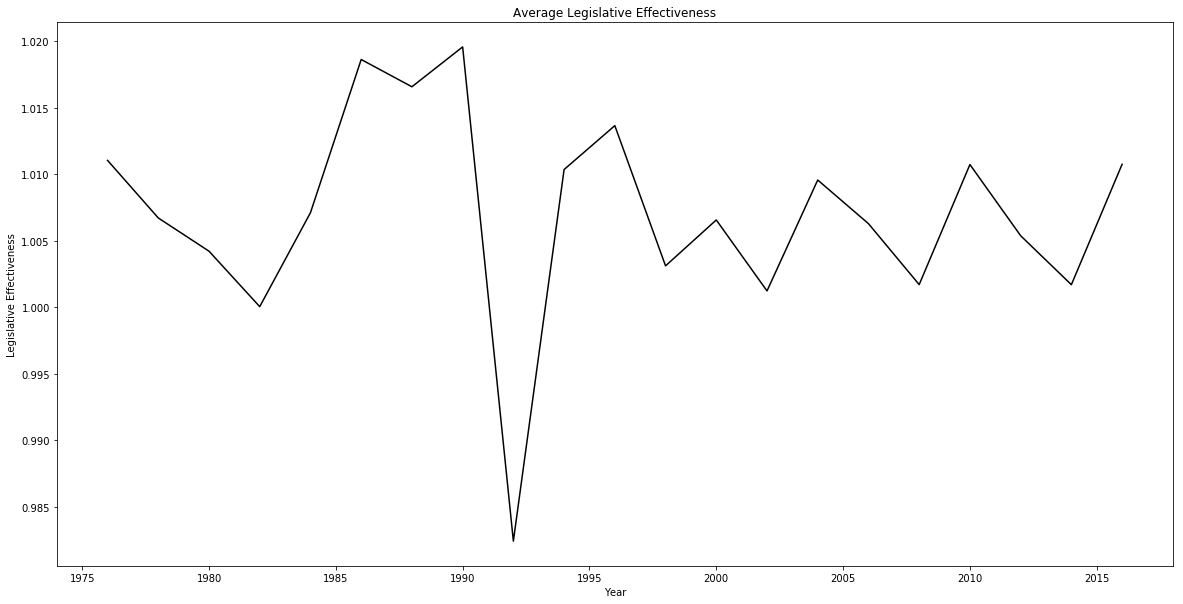

In [15]:
fig = plt.figure(figsize=[20, 10])

sns.lineplot(x=np.sort(district_eg.year.unique()), y=district_eg.groupby(['year']).mean()['le'].values, color='black')

plt.title("Average Legislative Effectiveness")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Year")

plt.show()

In [32]:
"""Deprecated"""
"""Adjusted legislative effectiveness"""

for i in range(len(eg)):
    
    year = eg.year.iloc[i]
    
    state_code = eg.state_code.iloc[i]
    
    relative_le = house_le.loc[(house_le.year==(year + 1))&(house_le.state_code==state_code), 'relative_le'].mean()
        
    eg.loc[eg.index==i, 'relative_le'] = relative_le    

In [56]:
"""Deprecated"""

full_eg_le = rd[rd.winner==1].copy(deep=True)

for i in range(len(full_eg_le)):
    
    year = full_eg_le.year.iloc[i]
    
    state = full_eg_le.state.iloc[i]
    
    state_code = full_eg_le.state_po.iloc[i]
    
    district = full_eg_le.district.iloc[i]
        
    party_eg = party_map(full_eg_le.party.iloc[i])
        
    egap = eg.loc[(eg.year==year)&(eg.state==state), party_eg].values
    
    leff = fix(house_le.loc[(house_le.year==year + 1)&(house_le.state_code==state_code)&(house_le.district==district), 'le'].values)
            
    party = party_fix(house_le.loc[(house_le.year==year + 1)&(house_le.state_code==state_code)&(house_le.district==district), 'democrat'].values)
    
    party_rank = fix(house_le.loc[(house_le.year==year + 1)&(house_le.state_code==state_code)&(house_le.district==district), 'party_rank'].values)

    full_eg_le.loc[full_eg_le.index==i, 'party'] = party
    
    full_eg_le.loc[full_eg_le.index==i, 'eg'] = egap
    
    full_eg_le.loc[full_eg_le.index==i, 'le'] = leff
        
    full_eg_le.loc[full_eg_le.index==i, 'party_rank'] = party_rank


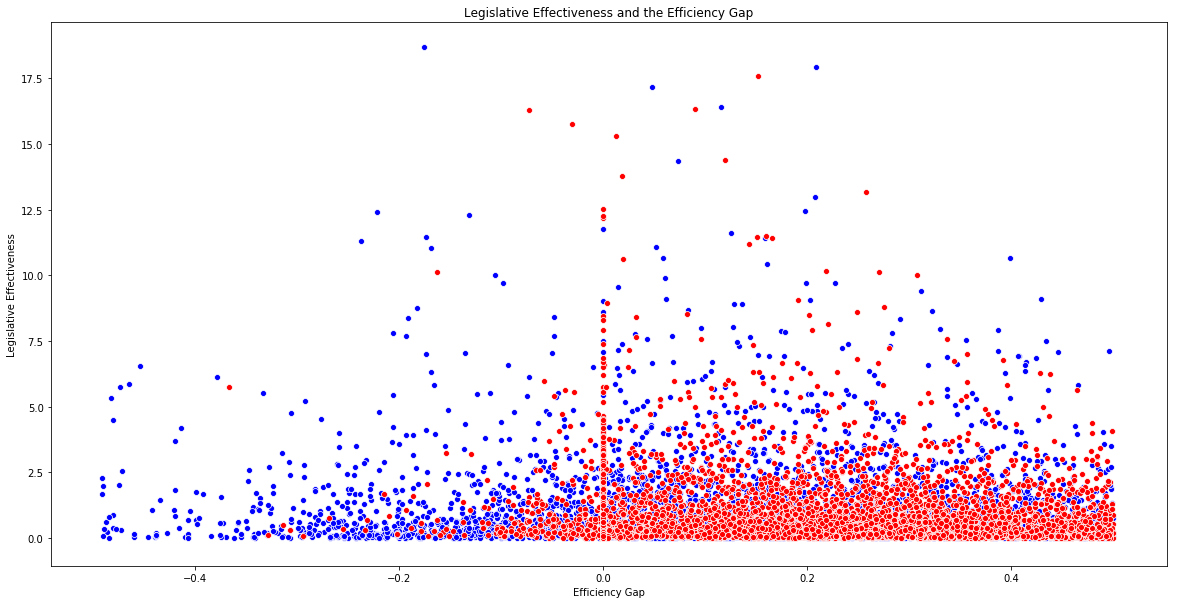

In [16]:
fig = plt.figure(figsize=[20, 10])

d = district_eg[district_eg.party=='democrat']

r = district_eg[district_eg.party=='republican']

sns.scatterplot(x=d.d_eg.values, y=d['le'].values, color='blue')
sns.scatterplot(x=r.r_eg.values, y=r['le'].values, color='red')


plt.title("Legislative Effectiveness and the Efficiency Gap")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Efficiency Gap")

plt.show()

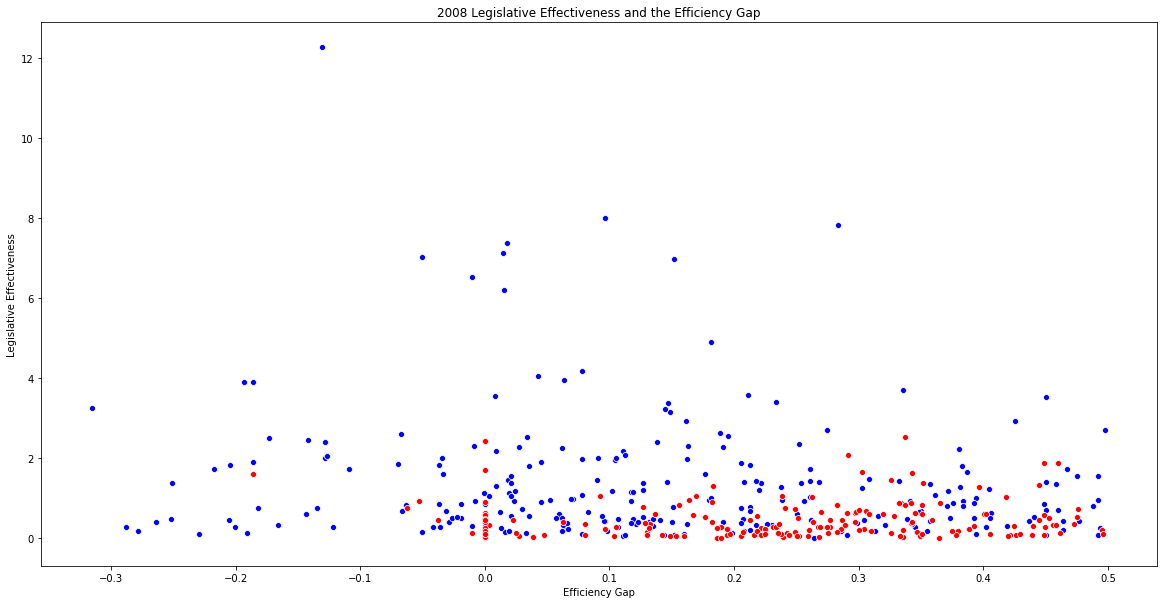

In [17]:
fig = plt.figure(figsize=[20, 10])

year = 2008

d = district_eg[(district_eg.party=='democrat')&(district_eg.year==year)]

r = district_eg[(district_eg.party=='republican')&(district_eg.year==year)]

sns.scatterplot(x=d.d_eg.values, y=d['le'].values, color='blue')
sns.scatterplot(x=r.r_eg.values, y=r['le'].values, color='red')


plt.title("2008 Legislative Effectiveness and the Efficiency Gap")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Efficiency Gap")

plt.show()

In [19]:
district_eg_le = district_eg.copy(deep=True)

district_eg_le.to_csv('district_eg_le.csv')

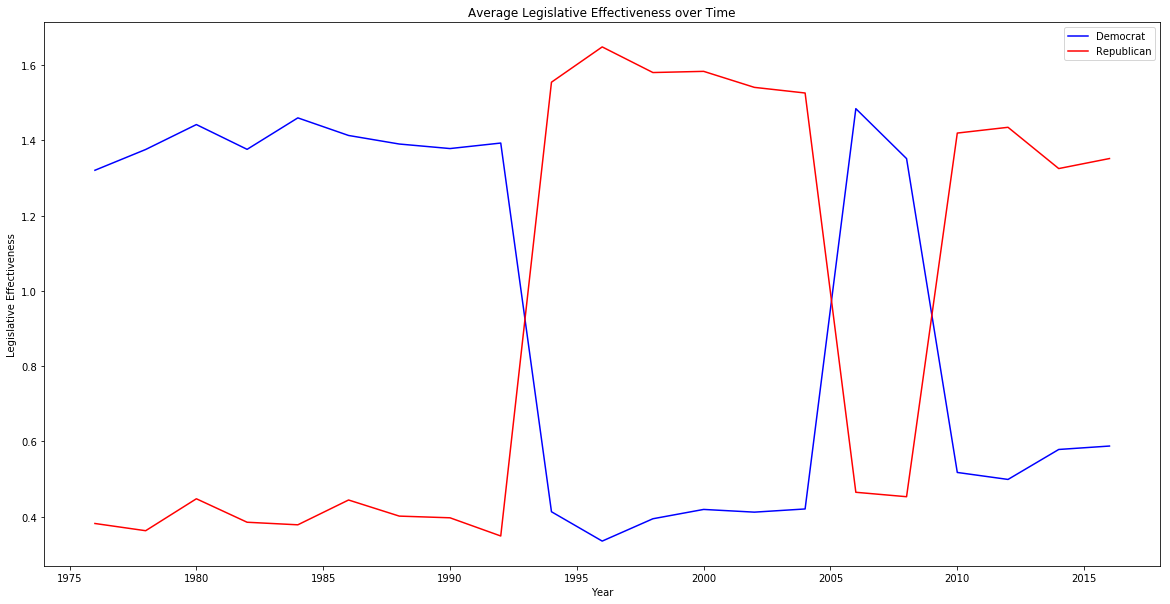

In [20]:
fig = plt.figure(figsize=[20, 10])

d = district_eg_le[district_eg_le.party=='democrat']

r = district_eg_le[district_eg_le.party=='republican']


sns.lineplot(x=np.sort(d.year.unique()), y=d.groupby('year').mean()['le'].values, color='blue', label='Democrat')

sns.lineplot(x=np.sort(r.year.unique()), y=r.groupby('year').mean()['le'].values, color='red', label='Republican')

plt.title("Average Legislative Effectiveness over Time")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Year")

plt.legend()

plt.show()

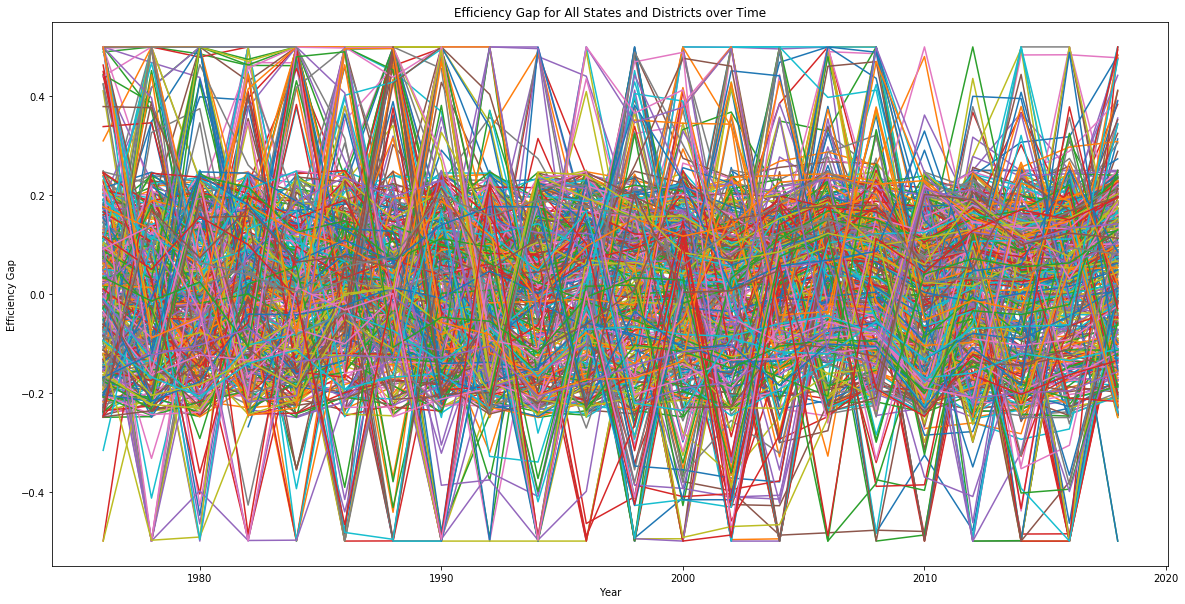

In [38]:
fig = plt.figure(figsize=[20, 10])

d = district_eg_le.copy(deep=True)

for state in d.state.unique():
    
    for district in d.loc[d.state==state, 'district'].unique():
        
        sns.lineplot(x=np.sort(d.loc[(d.state==state)&(d.district==district), 'year'].unique()), 
                     y=d.loc[(d.state==state)&(d.district==district), 'r_eg'])

plt.title("Efficiency Gap for All States and Districts over Time")

plt.ylabel("Efficiency Gap")

plt.xlabel("Year")

plt.show()

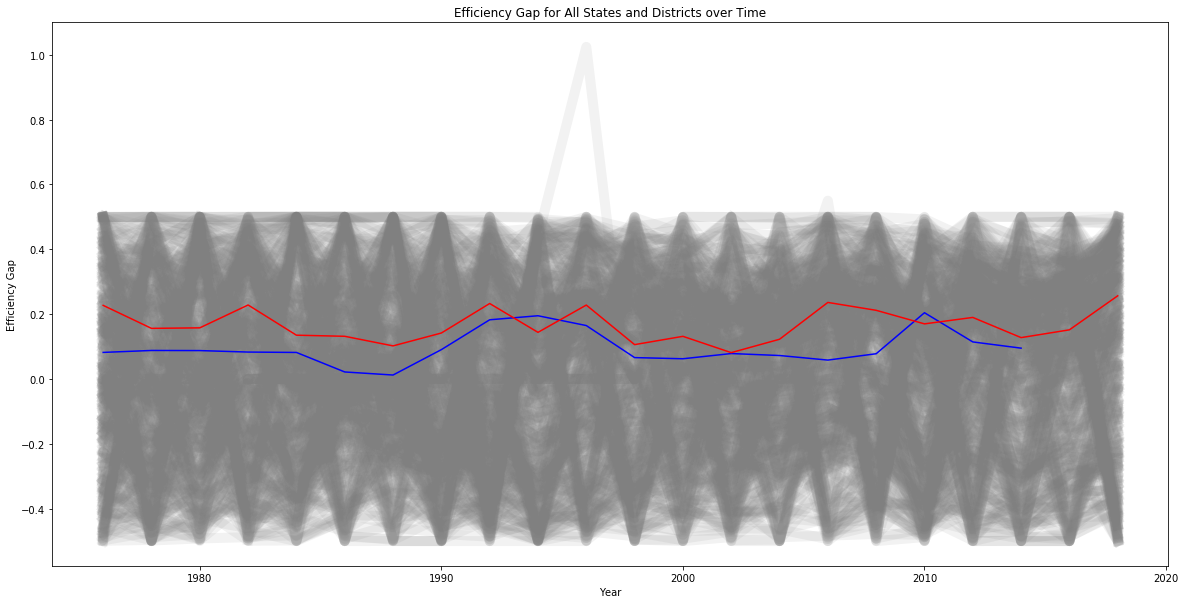

In [25]:
fig = plt.figure(figsize=[20, 10])

d = district_eg_le.copy(deep=True)

for state in d.state.unique():
    
    for district in d.loc[d.state==state, 'district'].unique():
        
        plt.plot(np.sort(d.loc[(d.state==state)&(d.district==district), 'year'].unique()), 
                 d.loc[(d.state==state)&(d.district==district), 'r_eg'], 
                 alpha=0.1, color='gray', lw=10)

d = district_eg_le[district_eg_le.winning_party=='democrat']

r = district_eg_le[district_eg_le.winning_party=='republican']


plt.plot(np.sort(d.year.unique()), d.groupby('year').mean()['d_eg'].values, color='blue', 
         label="Average Democratic LE")

plt.plot(np.sort(r.year.unique()), r.groupby('year').mean()['r_eg'].values, color='red', 
         label="Average Republic LE")


plt.title("Efficiency Gap for All States and Districts over Time")

plt.ylabel("Efficiency Gap")

plt.xlabel("Year")

plt.show()

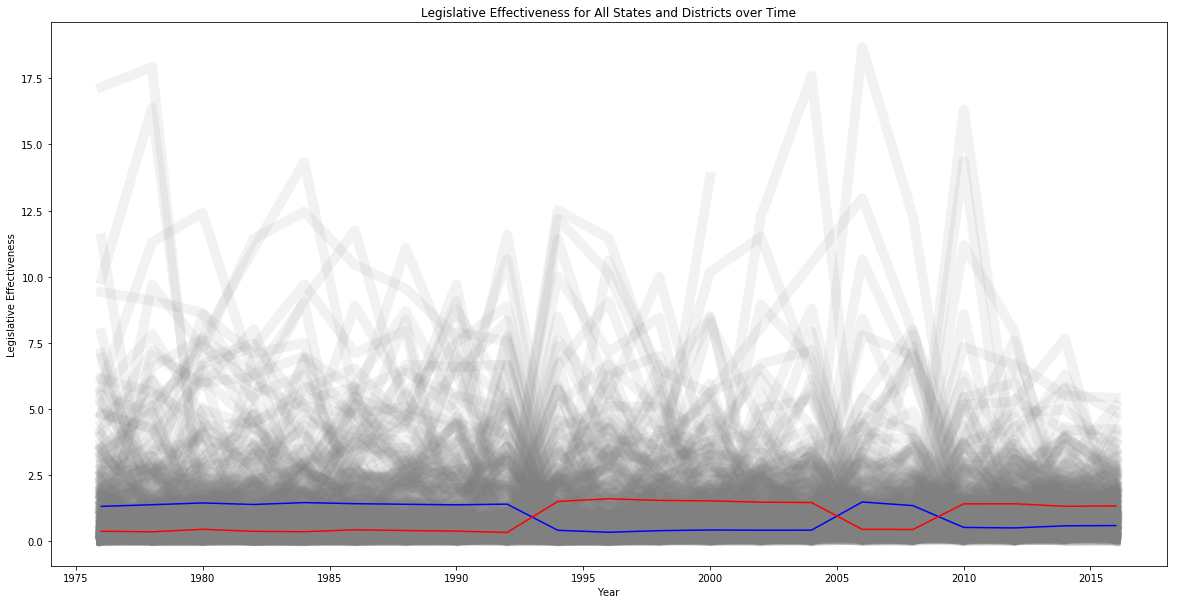

In [58]:
fig = plt.figure(figsize=[20, 10])

d = district_eg_le.copy(deep=True)

for state in d.state.unique():
    
    for district in d.loc[d.state==state, 'district'].unique():
        
        plt.plot(np.sort(d.loc[(d.state==state)&(d.district==district), 'year'].unique()), 
                 d.loc[(d.state==state)&(d.district==district), 'le'], 
                 alpha=0.1, color='gray', lw=10)

d = district_eg_le[district_eg_le.winning_party=='democrat']

r = district_eg_le[district_eg_le.winning_party=='republican']


plt.plot(np.sort(d.year.unique()), d.groupby('year').mean()['le'].values, color='blue', 
         label="Average Democratic LE")

plt.plot(np.sort(r.year.unique()), r.groupby('year').mean()['le'].values, color='red', 
         label="Average Republic LE")


plt.title("Legislative Effectiveness for All States and Districts over Time")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Year")

plt.show()

In [21]:
district_eg_le = district_eg_le[['year', 
                                 'state', 
                                 'state_code', 
                                 'district', 
                                 'candidate', 
                                 'party', 'd_eg', 'r_eg', 'le']]

In [28]:
"""Deprecated"""
"""Adding candidate to district_eg_le"""

for i in range(len(district_eg_le)):
    
    year = district_eg_le.iloc[i].year
    
    state = district_eg_le.iloc[i].state
    
    district = district_eg_le.iloc[i].district
    
    try:
    
        candidate = rh.loc[(rh.year==year)
                           &(rh.state==state)
                           &(rh.district==district)
                           &(rh.winner==1), 'candidate'].values[0]
        
    except:
        
        candidate = ""
                       
    district_eg_le.loc[district_eg_le.index==i, 'candidate'] = candidate

In [22]:
district_eg_le.to_json('district_eg_le.json', orient='index')

In [27]:
line_df = pd.DataFrame(columns=['name', 'party', 'state', 'district', 'context', 'le', 'eg'])

df = district_eg_le.copy(deep=True)

df = df[(df.party=='democrat') | (df.party=='republican')]

for candidate in df.candidate.unique():
    
    years = df.loc[df.candidate==candidate, 'year'].unique()
    
    try:
    
        party = df.loc[df.candidate==candidate, 'party'].values[0]
        
    except:
        
        party = ""
        
    try:
    
        state = df.loc[df.candidate==candidate, 'state'].values[0]
        
    except:
        
        state = ""
    
    try:
    
        district = df.loc[df.candidate==candidate, 'district'].values[0]
    
    except:
        
        district = ""
        
    le_list = []
    
    eg_list = []
    
    if candidate == 'democrat':
        
        eg = 'd_eg'
        
    elif candidate == 'republican':
    
        eg = 'r_eg'
            
    for year in years:
        
        if math.isnan(df.loc[(df.candidate==candidate)&(df.year==year), 'le'].values[0])==False:
    
            le_list.append({'year': year, 'le': df.loc[(df.candidate==candidate)&(df.year==year), 'le'].values[0]})
        
        if math.isnan(df.loc[(df.candidate==candidate)&(df.year==year), eg].values[0])==False:

            eg_list.append({'year': year, 'eg': df.loc[(df.candidate==candidate)&(df.year==year), eg].values[0]})
        
    line_df = line_df.append({'name': candidate,
                              'party': party,
                              'state': state,
                              'district': district,
                              'context': 'candidate', 
                              'le': str(le_list), 
                              'eg': str(eg_list)}, ignore_index=True)
    
for party in df.party.unique():
    
    years = df.loc[df.party==party, 'year'].unique()
        
    le_list = []
    
    eg_list = []
    
    eg = 'r_eg'
    
    if party == 'democrat':
        
        eg = 'd_eg'
    
    for year in years:
            
        le_list.append({'year': year, 'le': df.loc[(df.year==year), 'le'].mean()})
        
        eg_list.append({'year': year, 'eg': df.loc[(df.year==year), eg].mean()})
        
    line_df = line_df.append({'name': 'US-' + str(party) + '-average',
                              'party': party, 
                              'context': 'US',
                              'state': 'US',
                              'district': 'NA',
                              'le': str(le_list), 
                              'eg': str(eg_list)}, ignore_index=True)
        
        

In [28]:
line_df = line_df[['name', 'party', 'state', 'district', 'context', 'le', 'eg']]

In [30]:
line_df.to_csv('line_df.csv')

line_df.to_json('line.json', orient='records')

district_eg_le.to_json('district_eg_le.json', orient='records')

In [31]:
state_eg = district_eg_le.groupby(['year', 'state'], as_index=False).mean()

In [32]:
state_eg.to_csv('state_eg.csv')

state_eg.to_json('state_eg.csv', orient='records')

In [10]:
for i in range(len(district_eg_le)):
    
    if district_eg_le.iloc[i].party=='republican':
        
        district_eg_le.loc[district_eg_le.index==i, 'eg'] = district_eg_le.iloc[i].r_eg
        
    else:
        
        district_eg_le.loc[district_eg_le.index==i, 'eg'] = district_eg_le.iloc[i].d_eg